# Testing HotVis on the household graph

In [1]:
import csv
from HotVisFunctions import *
import pandas as pd

In [2]:
# load graph
hospital_graph = pp.io.read_csv_temporal_graph('graphs/Hospital/network/edges.csv', is_undirected = True, timestamp_format='%S')
# load metadata
meta_data = pd.read_csv("graphs/Hospital/network/nodes.csv")


Every class gets its own color.

In [3]:
print(meta_data["status"].unique())

['ADM' 'NUR' 'MED' 'PAT']


In [4]:
colors = {}
color_map = {'ADM': 'yellow', 'NUR': 'green', 'MED': 'blue', 'PAT':'pink'}
for index, row in meta_data.iterrows():
        colors[f"{row['index']}"] = color_map[row['status']]
style = {}
style['node_color'] = colors
style['node_size'] = 10
style['edge_size'] = 0.1
style['edge_opacity'] = 1


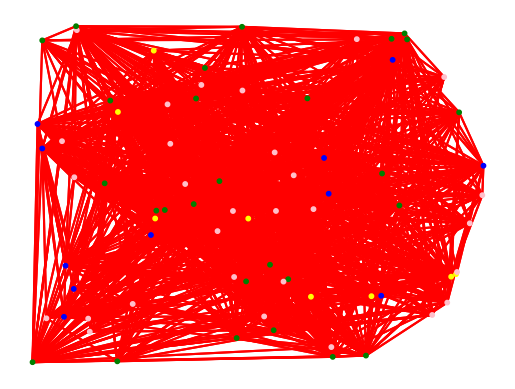

In [5]:
pp.plot(hospital_graph.to_static_graph(), backend='matplotlib' ,**style)

FÜR MORITZ: DIE NÄCHSTE ZELLE FUNKTIONIERT NICHT

In [6]:
layout_2 =  HotVis(hospital_graph, 2, 50000, 50, alpha=[1, 0.5], force=10)
layout_3 =  HotVis(hospital_graph, 3, 50000, 50, alpha=[1, 0.5, 0.3], force=10)
layout_5 =  HotVis(hospital_graph, 5, 50000, 50, alpha=[1, 0.5, 0.3, 0.2, 0.1], force=10)


100%|██████████| 50000/50000 [00:08<00:00, 5779.67it/s]


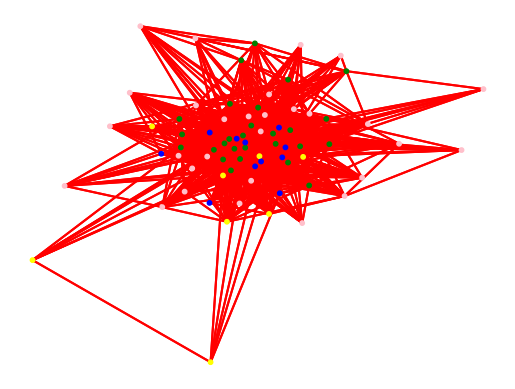

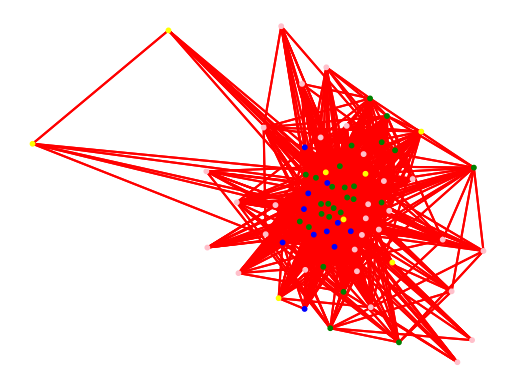

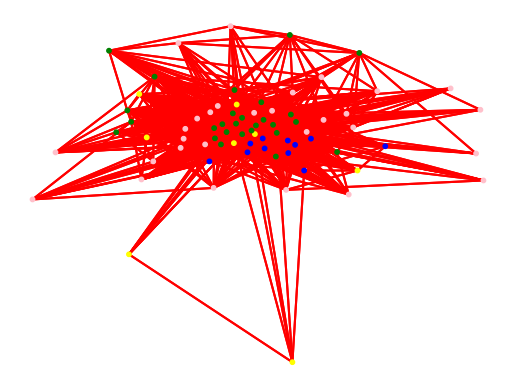

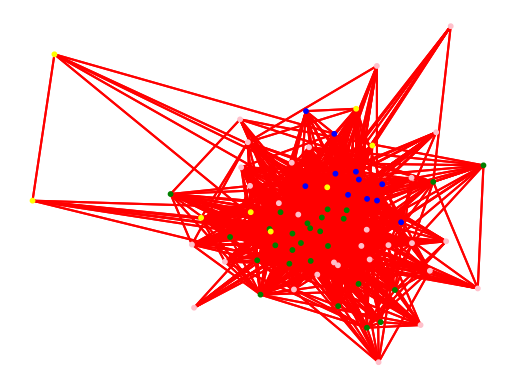

In [8]:
pp.plot(hospital_graph.to_static_graph(), layout=layout_2, backend='matplotlib' ,**style)
pp.plot(hospital_graph.to_static_graph(), layout=layout_3, backend='matplotlib' ,**style)
pp.plot(hospital_graph.to_static_graph(), layout=layout_5, backend='matplotlib' ,**style)
pp.plot(hospital_graph.to_static_graph(), layout="fr", backend='matplotlib' ,**style)